
## <font color="#dd0000">解决高方差的手段之一:</font>
### 模型正则化 (Regularization) :岭回归和 LASSO回归



### 岭回归

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [33]:

np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=666)

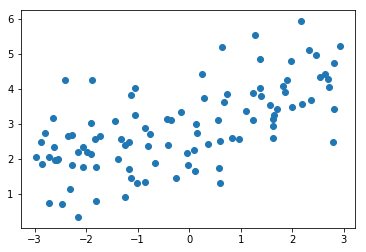

In [34]:
plt.scatter(x, y)
plt.show()

In [35]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)
    
    plt.scatter(x, y)
    plt.plot(X_plot[:, 0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()

In [36]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()), #标准化
        ("ridge_reg", Ridge(alpha = alpha))
    ])


In [37]:
ridge1_reg = RidgeRegression(20, 0.0001)
ridge1_reg.fit(X_train, y_train)

y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.0593042331476243

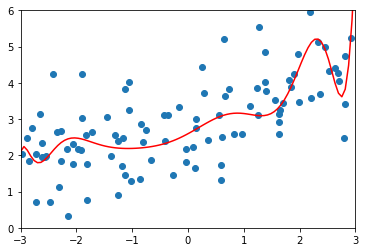

In [38]:
plot_model(ridge1_reg)

In [39]:
ridge2_reg = RidgeRegression(20, 1)
ridge2_reg.fit(X_train, y_train)

y2_predict = ridge2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

0.9265280691262733

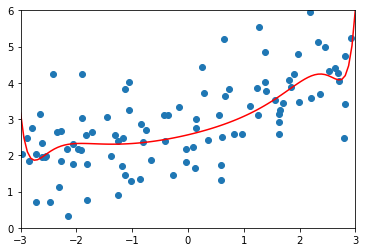

In [40]:
plot_model(ridge2_reg)

In [41]:
ridge3_reg = RidgeRegression(20, 100)
ridge3_reg.fit(X_train, y_train)

y3_predict = ridge3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)

1.22863431869086

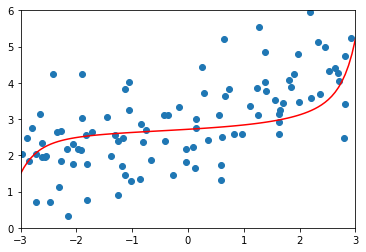

In [42]:
plot_model(ridge3_reg)

In [43]:
ridge4_reg = RidgeRegression(20, 10000000)
ridge4_reg.fit(X_train, y_train)

y4_predict = ridge4_reg.predict(X_test)
mean_squared_error(y_test, y4_predict)

1.6610753466332124

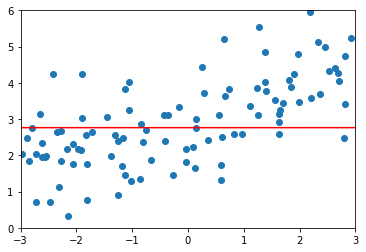

In [44]:
plot_model(ridge4_reg)